In [2]:
import numpy as np
import pandas as pd
import astropy.units as u
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [36]:
LAMBDA_LASER = 6328.16 # Angstrom

f_spectro = 220 * u.mm
n = 1200 / u.mm

fente_150 = pd.read_csv("data/2019-10-02/fente-150",
				names = ["lam", "cps"], sep="\t", skiprows=1)
fente_500 = pd.read_csv("data/raman/fente_500.txt",
				names = ["lam", "cps"], sep="\t", skiprows=1)
fente_200 = pd.read_csv("data/2019-10-02/fente-200",
				names = ["lam", "cps"], sep="\t", skiprows=1)
fente_50 = pd.read_csv("data/raman/fente_50.txt",
				names = ["lam", "cps"], sep="\t", skiprows=1)

plasma = pd.read_csv("data/raman/fente_full_100.txt",
				names = ["lam", "cps"], sep="\t", skiprows=1)

e1 = pd.read_csv("data/2019-10-02/e1-100-6600-6700",
				names = ["lam", "cps"], sep="\t", skiprows=1)

e2 = pd.read_csv("data/2019-10-02/e2-100-6400-6580",
				names = ["lam", "cps"], sep="\t", skiprows=1)

e3 = pd.read_csv("data/2019-10-02/e3-100-6400-6500",
				names = ["lam", "cps"], sep="\t", skiprows=1)

e3as= pd.read_csv("data/2019-10-02/e3-antistokes",
				names = ["lam", "cps"], sep="\t", skiprows=1)


def convert(lam_spectre):
	return (LAMBDA_LASER**(-1) - lam_spectre**(-1)) * 10**8 # cm-1

def invert(lam_raman):
    return (LAMBDA_LASER**(-1) - 10**(-8) * lam_raman)**(-1)

def gaussian(x, mu, sigma, A):
	return A * np.exp(-(x-mu)**2/ sigma**2 / 2)

def FWHM(sigma):
    return 2 * np.sqrt(2 * np.log(2)) * sigma

#fente_50["lam"] = fente_50["lam"].apply(convert)
#fente_200["lam"] = fente_200["lam"].apply(convert)
#fente_500["lam"] = fente_500["lam"].apply(convert)

fente_150["lam"] = fente_50["lam"] / 10 # nm
fente_200["lam"] = fente_200["lam"] / 10
fente_500["lam"] = fente_500["lam"] / 10
plasma["lam"] = plasma["lam"]
e1["lam"] = e1["lam"].apply(convert)
e2["lam"] = e2["lam"].apply(convert)
e3["lam"] = e3["lam"].apply(convert)
e3as["lam"] = e3as["lam"].apply(convert)

convert(6329)

2.0973298558031033

<Figure size 432x288 with 0 Axes>

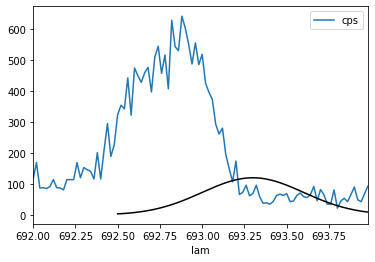

In [19]:
%matplotlib inline
lam = np.arange(692.5, 694, 0.01)
y_estimated = gaussian(lam, 693.3, 0.3, 120)
plt.figure()
mask = (fente_150["lam"] > 691) & (fente_150["lam"] < 694)
fente_150[mask].plot(x="lam", y="cps")
plt.plot(lam, y_estimated, "k-")

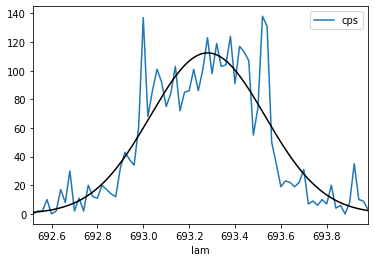

In [79]:
popt50, pcov50 = curve_fit(gaussian, 
                xdata=fente_50["lam"][mask],
                ydata=fente_50["cps"][mask],
                p0=[693.3, 0.3, 120])
fente_50[mask].plot(x="lam", y="cps")
plt.plot(lam,gaussian(lam, *popt50), "k-")

In [80]:
popt50

array([6.93280895e+02, 2.50905793e-01, 1.12392811e+02])

In [81]:
pcov50

array([[ 1.74326132e-04,  2.02459199e-07, -3.88187408e-05],
       [ 2.02459199e-07,  1.75248814e-04, -3.92243379e-02],
       [-3.88187408e-05, -3.92243379e-02,  2.62570047e+01]])

<Figure size 432x288 with 0 Axes>

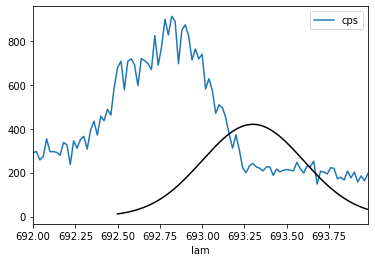

In [22]:
y_estimated = gaussian(lam, 693.3, 0.3, 420)
mask = (fente_200["lam"] > 690) & (fente_200["lam"] < 694)
plt.figure()
fente_200[mask].plot(x="lam", y="cps")
plt.plot(lam, y_estimated, "k-")

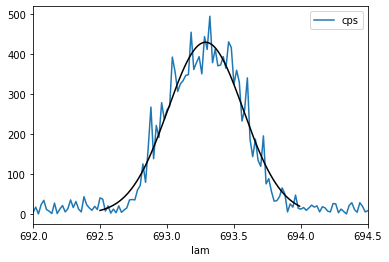

In [249]:
popt200, pcov200 = curve_fit(gaussian, 
                xdata=fente_200["lam"][mask],
                ydata=fente_200["cps"][mask],
                p0=[693.3, 0.3, 420])
fente_200[mask].plot(x="lam", y="cps")
plt.plot(lam, gaussian(lam, *popt200), "k-")

In [250]:
popt200

array([6.93287909e+02, 2.81942458e-01, 4.28986779e+02])

In [251]:
pcov200

array([[ 3.73553710e-05, -6.81946072e-10,  1.03957860e-06],
       [-6.81946072e-10,  3.73553838e-05, -2.84186243e-02],
       [ 1.03957860e-06, -2.84186243e-02,  6.48595703e+01]])

<Figure size 432x288 with 0 Axes>

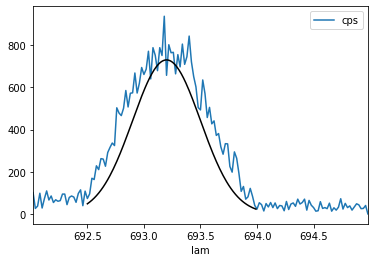

In [259]:
y_estimated = gaussian(lam, 693.2, 0.3, 730)
mask = (fente_500["lam"] > 692) & (fente_500["lam"] < 695)
plt.figure()
fente_500[mask].plot(x="lam", y="cps")
plt.plot(lam, y_estimated, "k-")

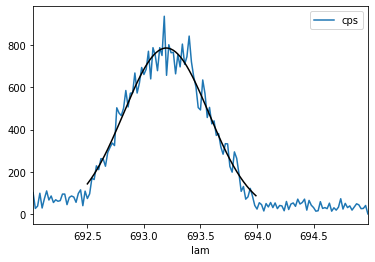

In [260]:
popt500, pcov500 = curve_fit(gaussian, 
                xdata=fente_500["lam"][mask],
                ydata=fente_500["cps"][mask],
                p0=[693.2, 0.3, 730])
fente_500[mask].plot(x="lam", y="cps")
plt.plot(lam, gaussian(lam, *popt500), "k-")

In [261]:
popt500

array([6.93197293e+02, 3.77209508e-01, 7.86358376e+02])

In [262]:
np.sqrt(np.abs(pcov500))

array([[5.65610070e-03, 9.88539934e-05, 3.11580271e-03],
       [9.88539934e-05, 5.65844909e-03, 1.82675406e-01],
       [3.11580271e-03, 1.82675406e-01, 1.02121211e+01]])

In [263]:
(FWHM(popt500[1]) * u.nm / 500 / u.micron).to(u.nm / u.mm)

<Quantity 1.77652102 nm / mm>

In [264]:
(np.sqrt(pcov500[1, 1]) * u.nm / 500 / u.micron).to(u.nm / u.mm)

<Quantity 0.0113169 nm / mm>

In [252]:
(FWHM(popt200[1]) / 200 * u.nm / u.micron).to(u.nm / u.mm)

<Quantity 3.31961876 nm / mm>

In [253]:
(np.sqrt(pcov200[1, 1]) * u.nm / 500 / u.micron).to(u.nm / u.mm)

<Quantity 0.01222381 nm / mm>

In [215]:
(FWHM(popt50[1]) / 50 * u.nm / u.micron).to(u.nm / u.mm)

<Quantity 11.81675981 nm / mm>

In [247]:
(np.sqrt(pcov50[1, 1]) * u.nm / 500 / u.micron).to(u.nm / u.mm)

<Quantity 0.02647632 nm / mm>

In [221]:
10**6 / 2 / n / f_spectro

<Quantity 1.89393939>

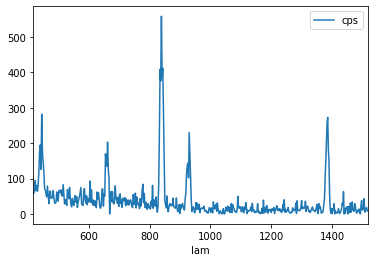

In [14]:
#plasma.lam = plasma.lam.apply(convert)
#[(plasma.lam > 6600)&(plasma.lam < 6700)]
plasma.plot(x="lam", y="cps")

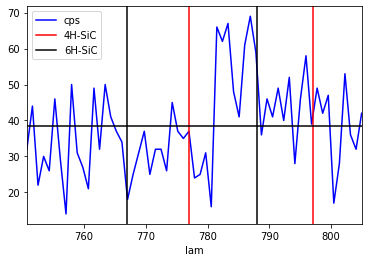

In [13]:
#red: 4H-SiC
#black: 6H-SiC
mask1 = (e1.lam > 750)&(e1.lam < 805)
e1[mask1].plot(x="lam", y="cps", color="b")
#plt.axvline(610.5, color="r")
plt.axvline(777, color="r", label="4H-SiC")
plt.axvline(797, color="r")
#plt.axvline(967, color="r")
#plt.axvline(966, color="k")
plt.axvline(788, color="k", label="6H-SiC")
plt.axvline(767, color="k")
#plt.axvline(505, color="k")
#plt.axvline(513, color="k")
#plt.axvline(888, color="k")
plt.axhline(e1[mask1].cps.mean(), color="k")
plt.legend()


In [233]:
e1["deviation"] = (e1.cps - e1[mask1].cps.mean())/e1[mask1].cps.std()

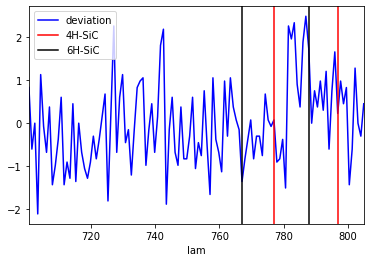

In [235]:
mask1 = (e1.lam > 700)&(e1.lam < 805)
e1[mask1].plot(x="lam", y="deviation", color="b")
#plt.axvline(610.5, color="r")
plt.axvline(777, color="r", label="4H-SiC")
plt.axvline(797, color="r")
#plt.axvline(967, color="r")
#plt.axvline(966, color="k")
plt.axvline(788, color="k", label="6H-SiC")
plt.axvline(767, color="k")
#plt.axvline(505, color="k")
#plt.axvline(513, color="k")
#plt.axvline(888, color="k")
plt.legend()

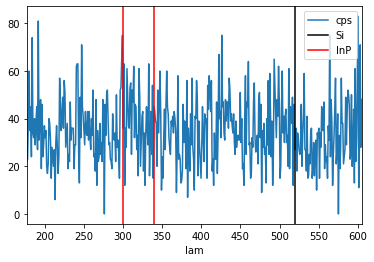

In [27]:
e2.plot(x="lam", y="cps")
plt.axvline(520, color="k", label="Si")
plt.axvline(300, color="r", label="InP")
plt.axvline(340, color="r")
plt.legend()

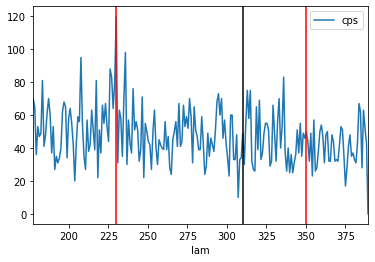

In [238]:
e3.plot(x="lam", y="cps")
plt.axvline(310, color="k", label=r'$SnS_2$')
plt.axvline(230, color="r")
plt.axvline(350, color="r", label=r"$TiS_2$")
plt.axhline()

In [266]:
0.5/200 * 10**3

2.5

In [267]:
0.4/150 * 10**3

2.666666666666667

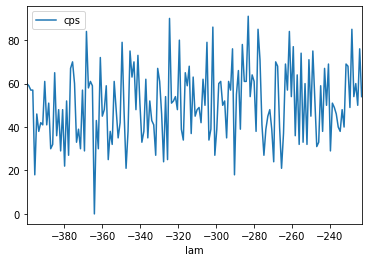

In [40]:
e3as[(e3as.lam > -400)&(e3as.lam < -223)].plot(x="lam", y="cps")